# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import torch
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


IMAGE_PATH = 'img_align_celeba/'
image_size = 64
# SAMPLE_PATH = '../'

# if not os.path.exists(SAMPLE_PATH):
#     os.makedirs(SAMPLE_PATH)
    
    
transform = transforms.Compose([
    #transforms.Scale(image_size),
    transforms.Resize(image_size),
    transforms.CenterCrop((image_size,image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
data_loader = ImageFolder(IMAGE_PATH, transform)


#data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)
valid_loader, train_loader, test_loader = get_celeba_dataloader(data_loader, 
                                                                batch_size=128)
test_batch = iter(test_loader)
test_batch = next(test_batch)
new_labels =torch.tensor(test_batch[1])
print(torch.tensor(test_batch[0]).shape)
#latent_dist = model.encode(torch.tensor(test_batch[0]).cuda())




162079 20259 20261
torch.Size([128, 3, 64, 64])


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


### Define latent distribution of the model

In [2]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.VAEmodel_f import VAE
from jointvae.training_l import Trainer
from torch import optim
from viz.visualize_l import Visualizer
import matplotlib.pyplot as plt
import numpy as np



#valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 20
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
#model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 2
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="FaceFig/PVAE/cont_{}/".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=20, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=20, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=30, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [3]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'modelDIPf_params.pkl')
torch.save(model, './modelDIPf')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!
#16-2033.294813156128 32-2846.2241864204407

0/162079	Loss: 1576.768
6400/162079	Loss: 1351.765
12800/162079	Loss: 998.495
19200/162079	Loss: 708.957
25600/162079	Loss: 562.875
32000/162079	Loss: 516.878
38400/162079	Loss: 488.733
44800/162079	Loss: 462.673
51200/162079	Loss: 450.237
57600/162079	Loss: 426.512
64000/162079	Loss: 417.567
70400/162079	Loss: 410.537
76800/162079	Loss: 404.098
83200/162079	Loss: 402.173
89600/162079	Loss: 392.051
96000/162079	Loss: 392.238
102400/162079	Loss: 390.386
108800/162079	Loss: 383.101
115200/162079	Loss: 377.842
121600/162079	Loss: 367.975
128000/162079	Loss: 365.307
134400/162079	Loss: 362.423
140800/162079	Loss: 355.839
147200/162079	Loss: 356.756
153600/162079	Loss: 352.718
160000/162079	Loss: 349.025
Valid Loss: 349.183, Recon Error: 0.077
349.18281430418386
Epoch: 1 Average loss: 481.36 Valid loss: 349.18281430418386	Recon Error:0.077
0/162079	Loss: 369.795
6400/162079	Loss: 348.637
12800/162079	Loss: 345.574
19200/162079	Loss: 345.451
25600/162079	Loss: 344.769
32000/162079	Loss: 337.

147200/162079	Loss: 301.051
153600/162079	Loss: 294.659
160000/162079	Loss: 298.054
Valid Loss: 302.631, Recon Error: 0.053
302.6311374880233
Epoch: 10 Average loss: 299.49 Valid loss: 302.6311374880233	Recon Error:0.053
0/162079	Loss: 301.033
6400/162079	Loss: 297.506
12800/162079	Loss: 298.768
19200/162079	Loss: 298.162
25600/162079	Loss: 298.853
32000/162079	Loss: 298.217
38400/162079	Loss: 299.899
44800/162079	Loss: 299.013
51200/162079	Loss: 298.711
57600/162079	Loss: 300.247
64000/162079	Loss: 298.761
70400/162079	Loss: 298.174
76800/162079	Loss: 296.434
83200/162079	Loss: 296.568
89600/162079	Loss: 297.614
96000/162079	Loss: 299.580
102400/162079	Loss: 299.245
108800/162079	Loss: 296.625
115200/162079	Loss: 297.812
121600/162079	Loss: 295.467
128000/162079	Loss: 299.419
134400/162079	Loss: 299.431
140800/162079	Loss: 296.741
147200/162079	Loss: 298.302
153600/162079	Loss: 295.841
160000/162079	Loss: 297.207
Valid Loss: 300.526, Recon Error: 0.056
300.5261399371069
Epoch: 11 Aver

89600/162079	Loss: 288.532
96000/162079	Loss: 291.055
102400/162079	Loss: 291.683
108800/162079	Loss: 290.104
115200/162079	Loss: 290.000
121600/162079	Loss: 292.726
128000/162079	Loss: 290.076
134400/162079	Loss: 290.281
140800/162079	Loss: 292.400
147200/162079	Loss: 289.895
153600/162079	Loss: 292.128
160000/162079	Loss: 288.303
Valid Loss: 295.189, Recon Error: 0.049
295.18930111291274
Epoch: 20 Average loss: 291.01 Valid loss: 295.18930111291274	Recon Error:0.049
0/162079	Loss: 287.645
6400/162079	Loss: 291.892
12800/162079	Loss: 288.951
19200/162079	Loss: 293.549
25600/162079	Loss: 292.340
32000/162079	Loss: 290.630
38400/162079	Loss: 290.994
44800/162079	Loss: 290.735
51200/162079	Loss: 288.275
57600/162079	Loss: 289.426
64000/162079	Loss: 289.042
70400/162079	Loss: 292.693
76800/162079	Loss: 288.306
83200/162079	Loss: 291.109
89600/162079	Loss: 288.805
96000/162079	Loss: 290.263
102400/162079	Loss: 291.719
108800/162079	Loss: 287.417
115200/162079	Loss: 289.694
121600/162079	Lo

32000/162079	Loss: 288.303
38400/162079	Loss: 286.034
44800/162079	Loss: 286.435
51200/162079	Loss: 286.015
57600/162079	Loss: 287.815
64000/162079	Loss: 288.263
70400/162079	Loss: 286.184
76800/162079	Loss: 286.403
83200/162079	Loss: 289.550
89600/162079	Loss: 288.520
96000/162079	Loss: 285.996
102400/162079	Loss: 287.103
108800/162079	Loss: 287.164
115200/162079	Loss: 287.078
121600/162079	Loss: 286.285
128000/162079	Loss: 286.227
134400/162079	Loss: 286.626
140800/162079	Loss: 286.350
147200/162079	Loss: 286.578
153600/162079	Loss: 284.968
160000/162079	Loss: 287.853
Valid Loss: 289.721, Recon Error: 0.052
289.72093133506536
Epoch: 30 Average loss: 287.12 Valid loss: 289.72093133506536	Recon Error:0.052
0/162079	Loss: 310.981
6400/162079	Loss: 286.676
12800/162079	Loss: 285.664
19200/162079	Loss: 285.493
25600/162079	Loss: 285.482
32000/162079	Loss: 284.382
38400/162079	Loss: 286.482
44800/162079	Loss: 287.896
51200/162079	Loss: 287.411
57600/162079	Loss: 286.414
64000/162079	Loss: 

0/162079	Loss: 277.990
6400/162079	Loss: 285.336
12800/162079	Loss: 285.111
19200/162079	Loss: 283.548
25600/162079	Loss: 284.674
32000/162079	Loss: 284.835
38400/162079	Loss: 284.189
44800/162079	Loss: 284.686
51200/162079	Loss: 283.578
57600/162079	Loss: 286.015
64000/162079	Loss: 283.019
70400/162079	Loss: 282.775
76800/162079	Loss: 282.952
83200/162079	Loss: 283.463
89600/162079	Loss: 288.541
96000/162079	Loss: 283.425
102400/162079	Loss: 286.311
108800/162079	Loss: 284.297
115200/162079	Loss: 286.999
121600/162079	Loss: 283.340
128000/162079	Loss: 286.048
134400/162079	Loss: 284.264
140800/162079	Loss: 285.069
147200/162079	Loss: 283.633
153600/162079	Loss: 285.974
160000/162079	Loss: 281.905
Valid Loss: 287.860, Recon Error: 0.057
287.8597920735677
Epoch: 40 Average loss: 284.80 Valid loss: 287.8597920735677	Recon Error:0.057
0/162079	Loss: 269.435
6400/162079	Loss: 283.364
12800/162079	Loss: 281.947
19200/162079	Loss: 284.700
25600/162079	Loss: 280.462
32000/162079	Loss: 283.352

140800/162079	Loss: 281.671
147200/162079	Loss: 281.818
153600/162079	Loss: 282.217
160000/162079	Loss: 284.022
Valid Loss: 287.739, Recon Error: 0.062
287.7386301868367
Epoch: 49 Average loss: 283.21 Valid loss: 287.7386301868367	Recon Error:0.062
0/162079	Loss: 295.936
6400/162079	Loss: 284.279
12800/162079	Loss: 282.588
19200/162079	Loss: 281.962
25600/162079	Loss: 285.002
32000/162079	Loss: 283.126
38400/162079	Loss: 283.059
44800/162079	Loss: 284.122
51200/162079	Loss: 280.382
57600/162079	Loss: 282.128
64000/162079	Loss: 282.121
70400/162079	Loss: 283.027
76800/162079	Loss: 281.335
83200/162079	Loss: 283.886
89600/162079	Loss: 282.478
96000/162079	Loss: 282.504
102400/162079	Loss: 282.112
108800/162079	Loss: 283.676
115200/162079	Loss: 282.013
121600/162079	Loss: 282.001
128000/162079	Loss: 281.212
134400/162079	Loss: 282.647
140800/162079	Loss: 283.693
147200/162079	Loss: 283.446
153600/162079	Loss: 283.381
160000/162079	Loss: 283.283
Valid Loss: 286.212, Recon Error: 0.057
286.

83200/162079	Loss: 280.769
89600/162079	Loss: 284.478
96000/162079	Loss: 280.888
102400/162079	Loss: 282.361
108800/162079	Loss: 280.513
115200/162079	Loss: 280.878
121600/162079	Loss: 283.848
128000/162079	Loss: 282.297
134400/162079	Loss: 280.949
140800/162079	Loss: 283.039
147200/162079	Loss: 283.774
153600/162079	Loss: 281.188
160000/162079	Loss: 281.437
Valid Loss: 286.202, Recon Error: 0.055
286.2017424961306
Epoch: 59 Average loss: 281.90 Valid loss: 286.2017424961306	Recon Error:0.055
0/162079	Loss: 302.264
6400/162079	Loss: 280.214
12800/162079	Loss: 280.736
19200/162079	Loss: 279.428
25600/162079	Loss: 280.356
32000/162079	Loss: 282.009
38400/162079	Loss: 281.057
44800/162079	Loss: 283.107
51200/162079	Loss: 281.862
57600/162079	Loss: 283.314
64000/162079	Loss: 284.599
70400/162079	Loss: 282.150
76800/162079	Loss: 281.910
83200/162079	Loss: 283.790
89600/162079	Loss: 281.175
96000/162079	Loss: 279.840
102400/162079	Loss: 281.241
108800/162079	Loss: 279.598
115200/162079	Loss:

25600/162079	Loss: 280.648
32000/162079	Loss: 279.469
38400/162079	Loss: 278.155
44800/162079	Loss: 281.521
51200/162079	Loss: 281.888
57600/162079	Loss: 281.291
64000/162079	Loss: 281.860
70400/162079	Loss: 280.817
76800/162079	Loss: 281.255
83200/162079	Loss: 278.695
89600/162079	Loss: 281.020
96000/162079	Loss: 281.494
102400/162079	Loss: 282.319
108800/162079	Loss: 279.396
115200/162079	Loss: 282.253
121600/162079	Loss: 279.864
128000/162079	Loss: 279.187
134400/162079	Loss: 279.011
140800/162079	Loss: 282.261
147200/162079	Loss: 281.917
153600/162079	Loss: 281.000
160000/162079	Loss: 280.877
Valid Loss: 285.074, Recon Error: 0.047
285.07390378556164
Epoch: 69 Average loss: 280.86 Valid loss: 285.07390378556164	Recon Error:0.047
0/162079	Loss: 281.588
6400/162079	Loss: 278.011
12800/162079	Loss: 282.029
19200/162079	Loss: 278.283
25600/162079	Loss: 279.167
32000/162079	Loss: 279.907
38400/162079	Loss: 280.678
44800/162079	Loss: 279.251
51200/162079	Loss: 280.832
57600/162079	Loss: 

Valid Loss: 284.885, Recon Error: 0.056
284.88469038669416
Epoch: 78 Average loss: 280.11 Valid loss: 284.88469038669416	Recon Error:0.056
0/162079	Loss: 261.779
6400/162079	Loss: 281.680
12800/162079	Loss: 280.156
19200/162079	Loss: 278.076
25600/162079	Loss: 278.589
32000/162079	Loss: 281.654
38400/162079	Loss: 279.414
44800/162079	Loss: 278.639
51200/162079	Loss: 280.579
57600/162079	Loss: 278.626
64000/162079	Loss: 278.580
70400/162079	Loss: 282.117
76800/162079	Loss: 277.940
83200/162079	Loss: 281.440
89600/162079	Loss: 280.107
96000/162079	Loss: 279.701
102400/162079	Loss: 281.431
108800/162079	Loss: 279.210
115200/162079	Loss: 281.681
121600/162079	Loss: 281.108
128000/162079	Loss: 278.404
134400/162079	Loss: 280.617
140800/162079	Loss: 278.838
147200/162079	Loss: 280.741
153600/162079	Loss: 279.283
160000/162079	Loss: 279.120
Valid Loss: 283.880, Recon Error: 0.052
283.88018760441236
Epoch: 79 Average loss: 280.06 Valid loss: 283.88018760441236	Recon Error:0.052
0/162079	Loss: 

108800/162079	Loss: 278.966
115200/162079	Loss: 278.845
121600/162079	Loss: 281.090
128000/162079	Loss: 280.506
134400/162079	Loss: 279.761
140800/162079	Loss: 278.061
147200/162079	Loss: 280.088
153600/162079	Loss: 278.468
160000/162079	Loss: 279.172
Valid Loss: 284.749, Recon Error: 0.054
284.74867565227004
Epoch: 88 Average loss: 279.43 Valid loss: 284.74867565227004	Recon Error:0.054
0/162079	Loss: 251.242
6400/162079	Loss: 279.066
12800/162079	Loss: 277.636
19200/162079	Loss: 277.944
25600/162079	Loss: 278.095
32000/162079	Loss: 281.631
38400/162079	Loss: 279.057
44800/162079	Loss: 279.263
51200/162079	Loss: 277.972
57600/162079	Loss: 279.143
64000/162079	Loss: 280.960
70400/162079	Loss: 282.454
76800/162079	Loss: 277.107
83200/162079	Loss: 279.941
89600/162079	Loss: 279.119
96000/162079	Loss: 279.148
102400/162079	Loss: 278.219
108800/162079	Loss: 278.679
115200/162079	Loss: 279.479
121600/162079	Loss: 279.215
128000/162079	Loss: 280.457
134400/162079	Loss: 281.109
140800/162079	

51200/162079	Loss: 278.350
57600/162079	Loss: 278.703
64000/162079	Loss: 279.503
70400/162079	Loss: 278.054
76800/162079	Loss: 278.095
83200/162079	Loss: 275.466
89600/162079	Loss: 277.988
96000/162079	Loss: 279.278
102400/162079	Loss: 279.196
108800/162079	Loss: 280.608
115200/162079	Loss: 280.203
121600/162079	Loss: 279.546
128000/162079	Loss: 277.400
134400/162079	Loss: 281.515
140800/162079	Loss: 279.724
147200/162079	Loss: 279.346
153600/162079	Loss: 278.835
160000/162079	Loss: 277.678
Valid Loss: 283.935, Recon Error: 0.059
283.9347398865898
Epoch: 98 Average loss: 278.96 Valid loss: 283.9347398865898	Recon Error:0.059
0/162079	Loss: 282.146
6400/162079	Loss: 279.045
12800/162079	Loss: 279.129
19200/162079	Loss: 280.306
25600/162079	Loss: 277.960
32000/162079	Loss: 279.893
38400/162079	Loss: 277.592
44800/162079	Loss: 278.656
51200/162079	Loss: 277.935
57600/162079	Loss: 279.479
64000/162079	Loss: 279.189
70400/162079	Loss: 277.929
76800/162079	Loss: 276.118
83200/162079	Loss: 27

In [4]:
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model.load_state_dict(torch.load('modelDIPf_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
print(lr)
if not os.path.exists(path):
    os.makedirs(path)

28520
0.0005


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

(8, 8)
0.9848269


/data/home/ISO/Pruned_VAE/viz/visualize_l.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


0.0


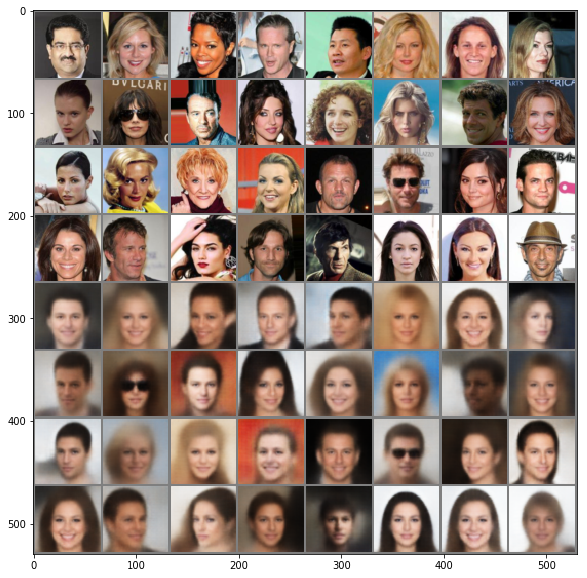

In [5]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
recon=np.rollaxis(recon.numpy(), 0, 3)  
print(recon[265:,:,:].max())
recon[:,:,:]=(recon[:,:,:]+1)/2
plt.imshow(recon[:,:,:].astype(float))
print(recon[:,:,:].min())

#MNIST
# plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
# print(recon.numpy()[0, :, :].max())
plt.savefig(path+"/recon.png")



In [6]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        #print(np.sum(cov**2) )
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)
#16  12.551628477254491 2.2266025315596838e-05 Valid Loss: 220.690, Recon Error: 0.185
#32  32.79880483590873 0.26285673431150475 Valid Loss: 68.768, Recon Error: 0.0145

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


20.92627837223077 0.5829505942902475
Valid Loss: 285.941, Recon Error: 0.048


(285.9412054865615, tensor(0.0479, device='cuda:0', grad_fn=<DivBackward0>))

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


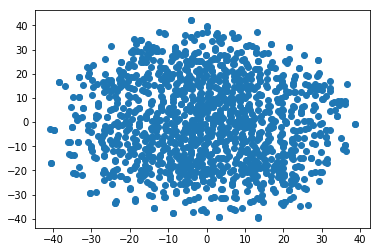

In [7]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

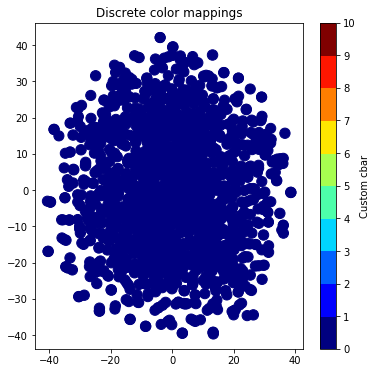

In [8]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')

plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

0.9999936


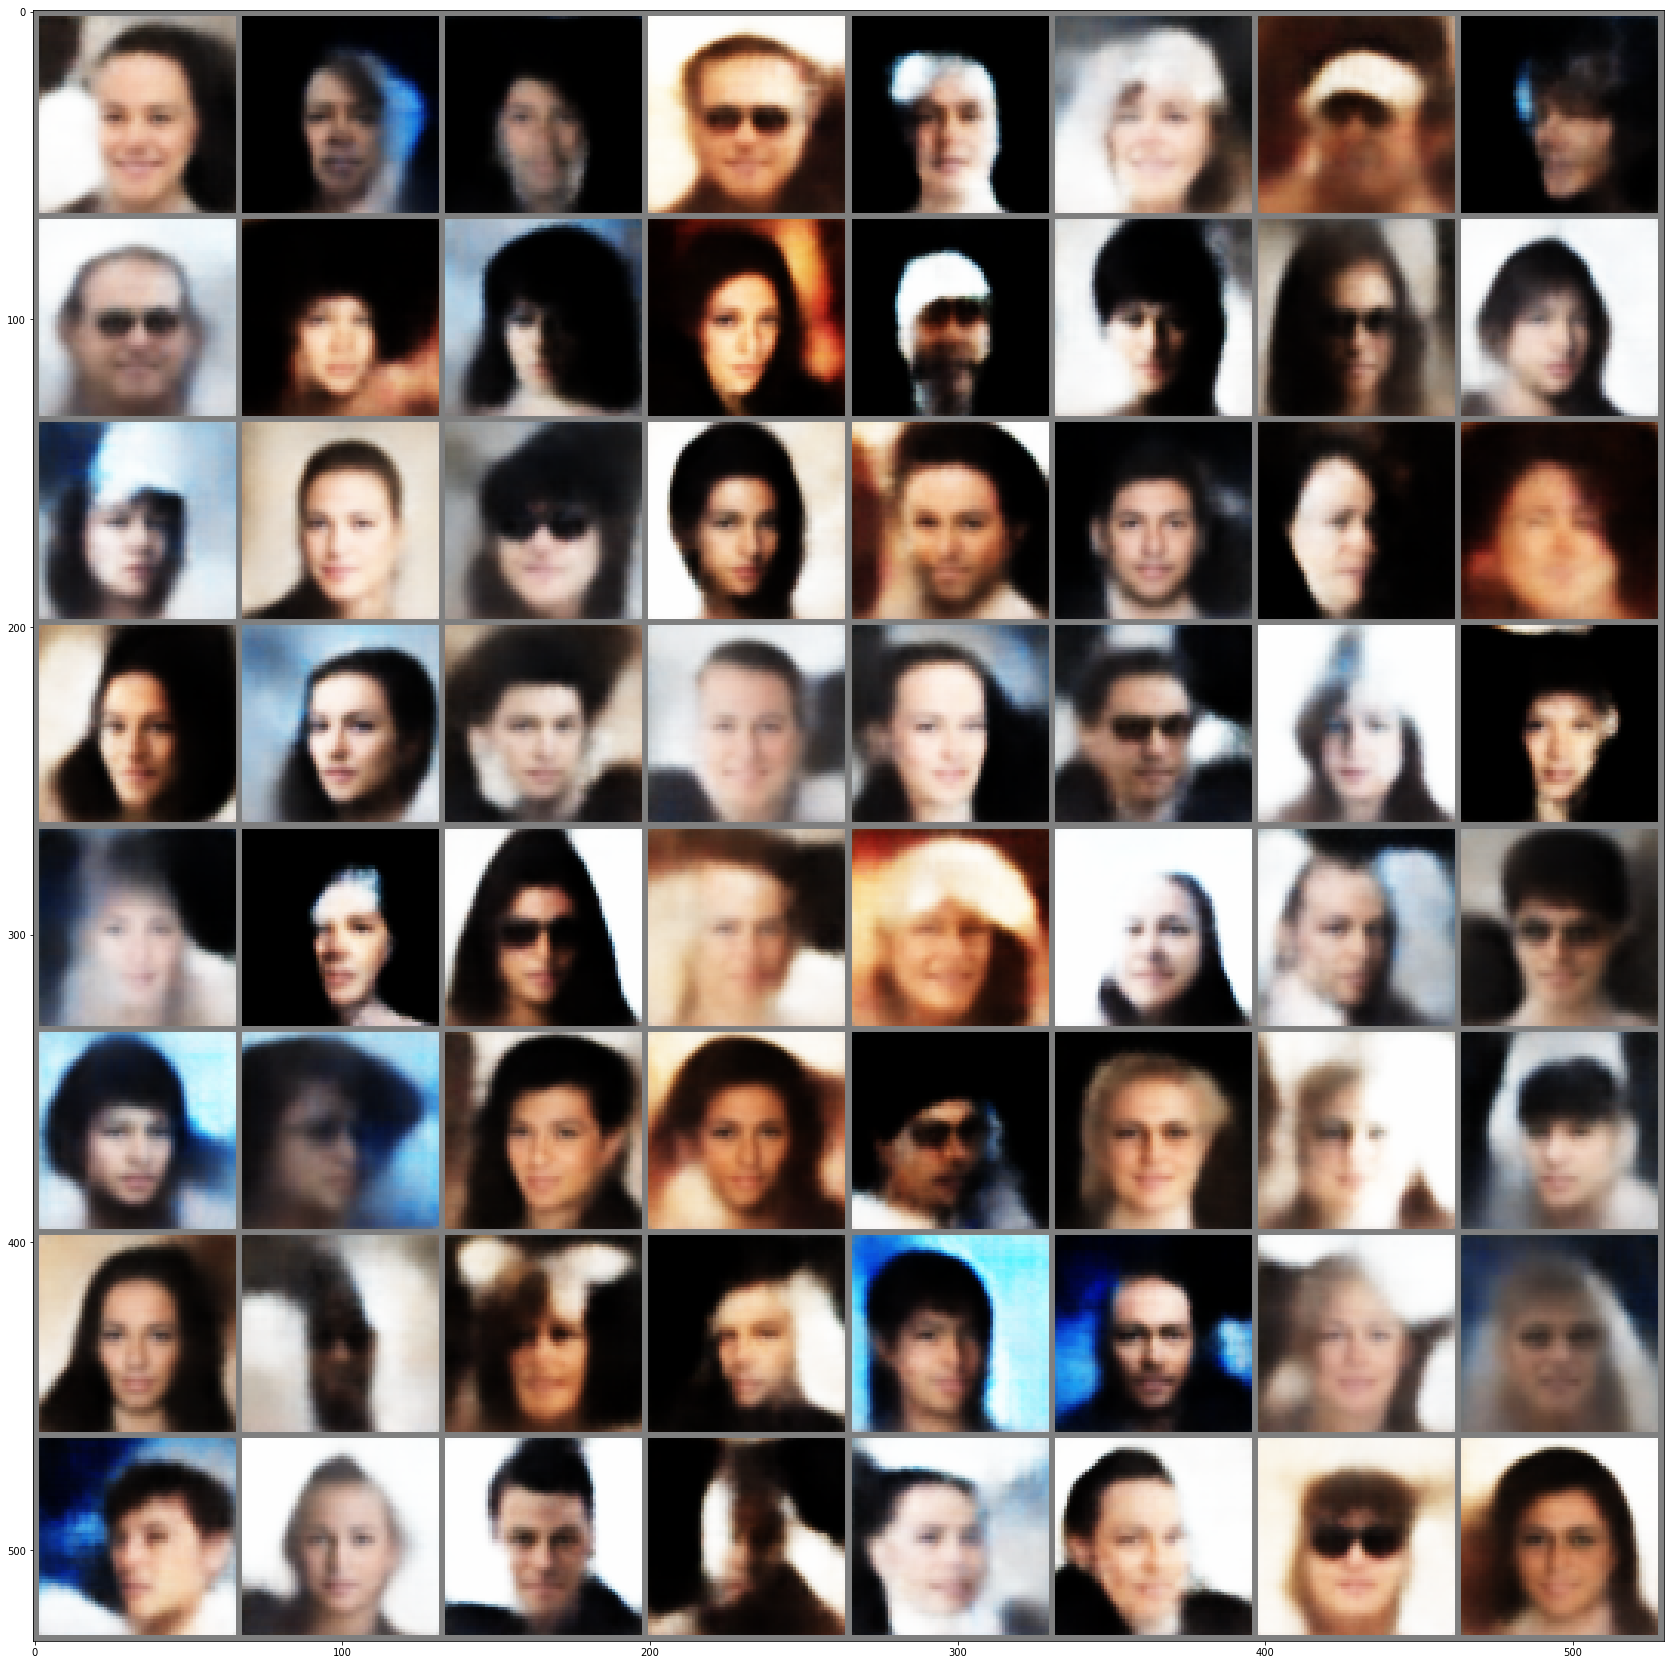

In [9]:
# Plot samples
import matplotlib as mpl

#MNIST
# samples = viz.samples()
# sample=samples.numpy()[0, :, :]/2+0.5
# plt.imshow(sample, cmap='gray')
# plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

# face
fig = plt.figure(figsize=(30, 30)) 
samples = viz.samples()
samples = np.rollaxis(samples.numpy(), 0, 3)  
print(samples[:,:,0].max())
samples=(samples+1)/2
plt.imshow(samples.astype(float),norm = norm)
plt.imsave(path+"/samples",samples)
###DIP

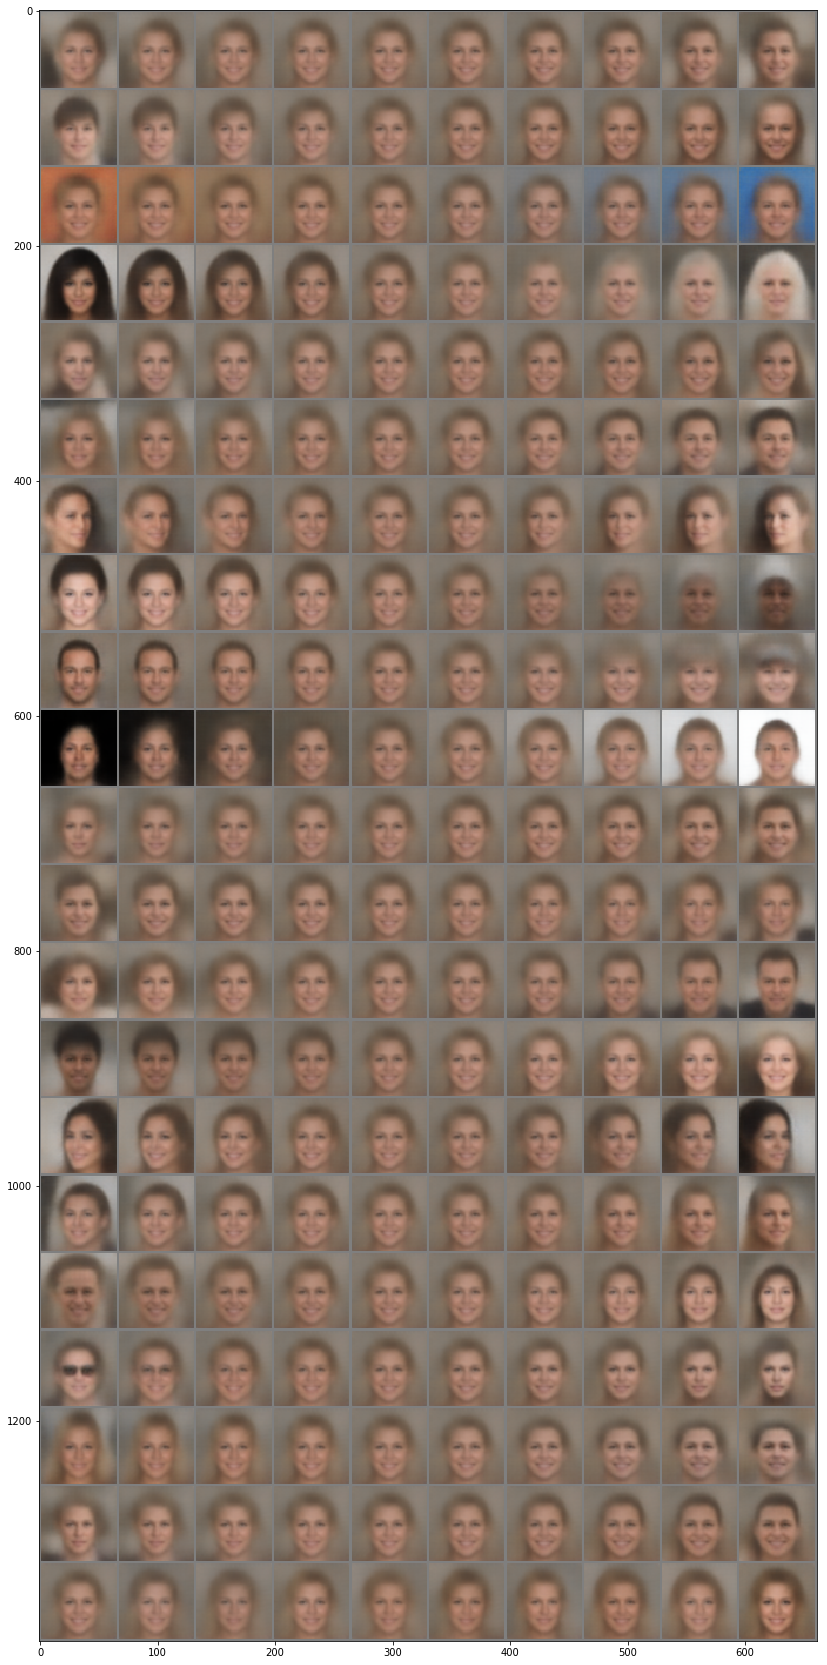

In [10]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)  
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

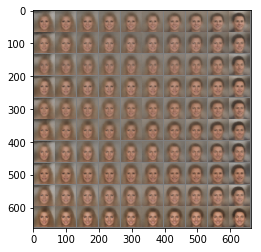

In [11]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

# traversals.numpy()[0, :, :].max()
#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


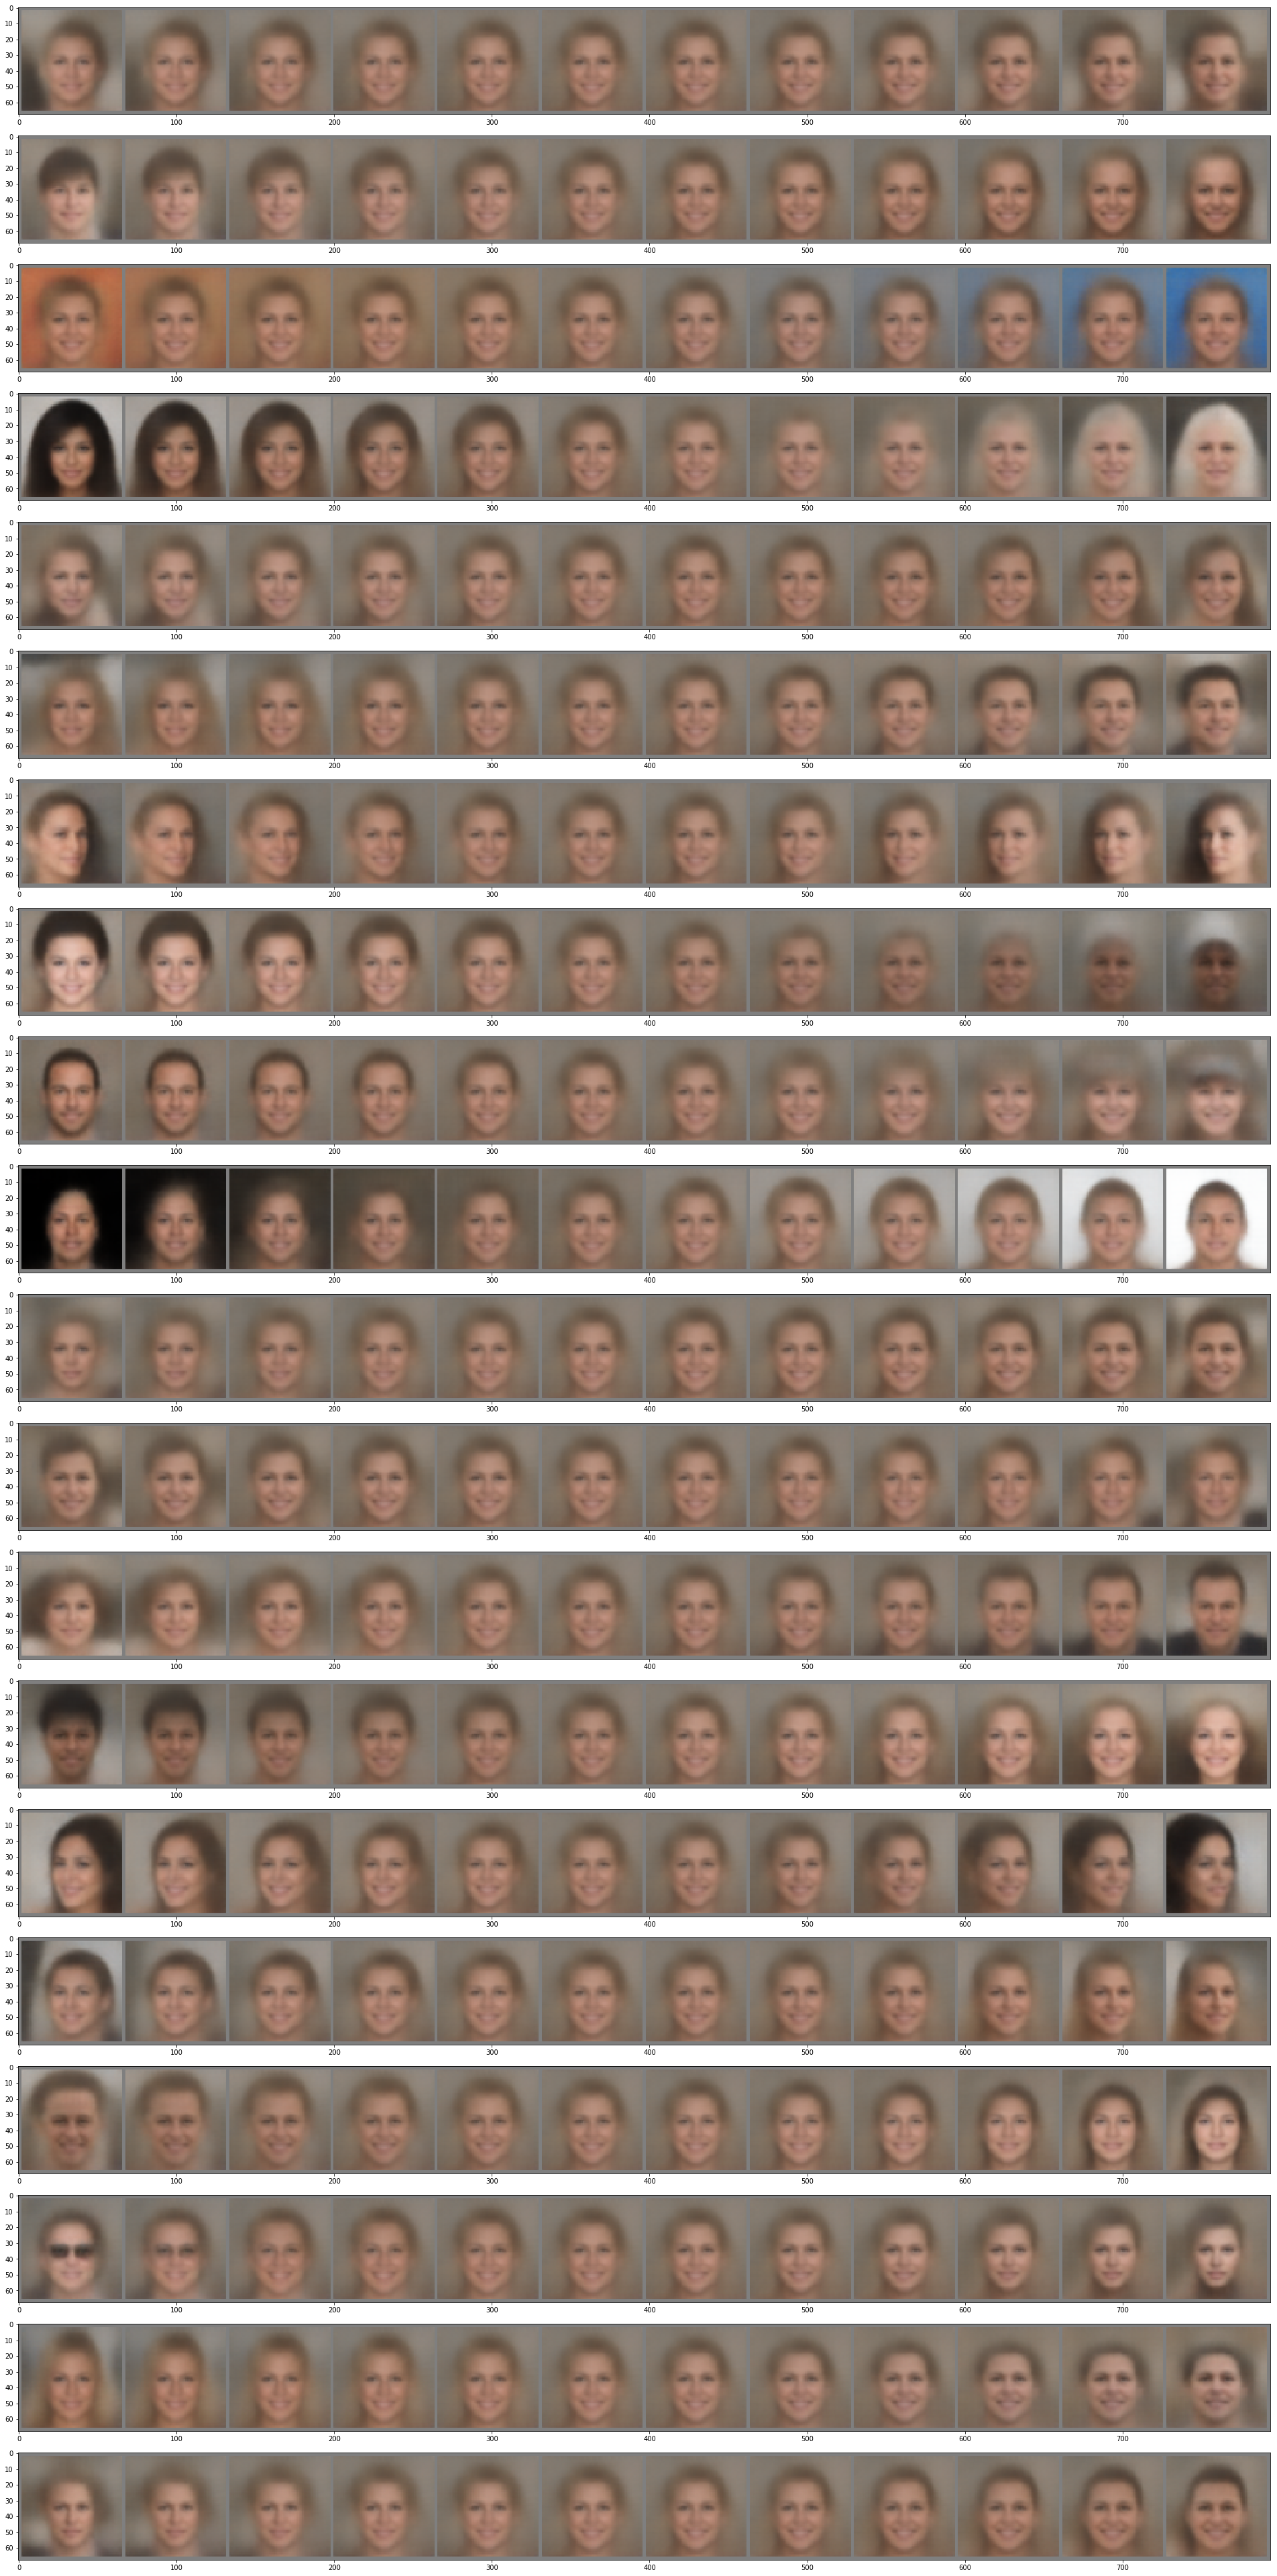

In [12]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     plt.savefig(path+"/cont{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_cont, 1, i + 1)
    traversals=(traversals+1)/2
    plt.imshow(traversals)   
plt.savefig(path+"/cont.png")
   

discrete


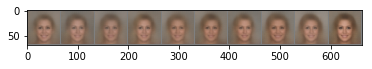

In [13]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
#     sub = fig.add_subplot(n_disc, 1, i + 1)
#     plt.savefig(path+"/disc{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_disc, 1, i + 1)
traversals=(traversals+1)/2
plt.savefig(path+"/disc{}.png".format(i))
plt.imshow(traversals)

In [14]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
        generated = (generated +1)/2
        print(generated.min(),generated.max())
        plt.imshow(generated)

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
            result = model.decode(latent_samples).cpu()
        return result

#MNIST
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         plt.imshow(generated.detach().numpy(),cmap="gray")

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#         return model.decode(latent_samples).cpu()

In [15]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)

interactive(children=(IntSlider(value=10, description='cont_idx', max=20), FloatSlider(value=0.0, description=…